In [66]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

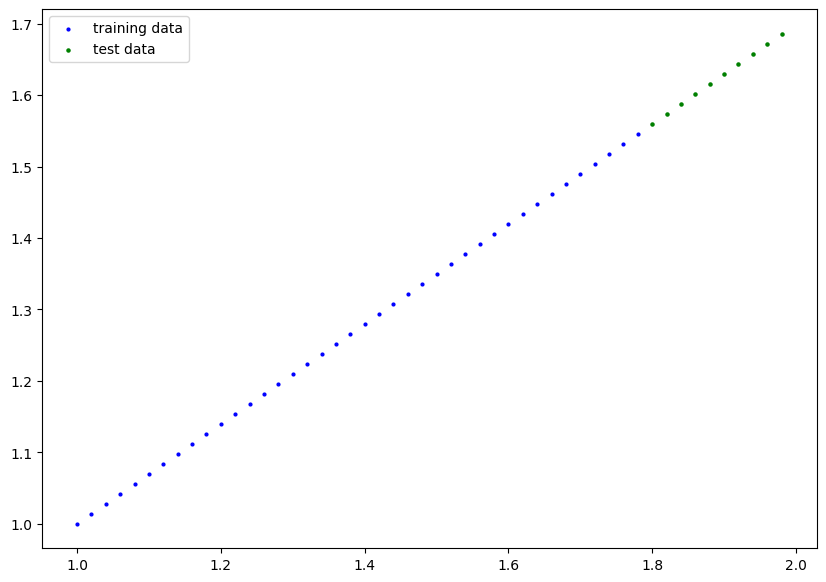

In [67]:
# preparing and loading data

# exploring with known parameters
weight, bias = 0.7, 0.3

# data with range between 0 and 1 with stepor difference of 0.02 betwen numbers
X = torch.arange(1, 2, 0.02).unsqueeze(dim=1) # dim=1 adds an extra dimension or column
y = weight * X + bias

# splitting data into training and test sets using sklearn
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split: ], y[train_split:]

# method to visualize daa
def plot_predictions(train_data=X_train,
                                train_labels=y_train,
                                test_data=X_test,
                                test_labels=y_test,
                                predictions=None):
    # set figure size
    plt.figure(figsize=(10,7))
    #plotting training data
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=5, label="test data")

    # plot predictions if they are available
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend()

plot_predictions()

In [68]:
# a simple linear regression model:
# starts with random values of weights and bias -> looks at training data and adjusts random values
#   to get closer to ideal data using gradient descent and backpropagation
## nn.Module contains inbuilt methods that can be used to build models
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        # initialize weights and bias (parameters) with random values
        # goal of the model in general is to get these random values to the actual weights and bias
        # that is used by the input data to generate output data
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method for computation
    def forward(self, X: torch.Tensor) -> torch.Tensor: # takes tensor as input and returns tensor as output
        return self.weights * X + self.bias


torch.nn: contains all the buidling blocks for computational graphs, where in this context the computational graph is a neural network
nn.Parameter: parameters that the model should learn which are often set by torch.nn
nn.Module: base class for building neural network modules, and if it is subclassed, forward method should be overridden
torch.optim: optimizer methods offered by pytorch that contains gradient descent and other optimizers
forward: all nn.Module subclasses must override forward method which defines what happens in the forward computation



In [69]:
# random seed to ensure that the random numbers are generaed in the same manner everytime
torch.manual_seed(32)

model_linear_rig = LinearRegressionModel()

# has in built methods to get the parameters of the model
print(list(model_linear_rig.parameters()))

# named parameters
print(model_linear_rig.state_dict())

[Parameter containing:
tensor([0.8651], requires_grad=True), Parameter containing:
tensor([0.0284], requires_grad=True)]
OrderedDict([('weights', tensor([0.8651])), ('bias', tensor([0.0284]))])


In [70]:
# simple predictor
# inference mode is generally used for the model that is trained so using it on a model will not
# update weights or parameters but rather just makes the predictions
with torch.inference_mode(): #  only makes predictions and does not compute graidents or update weights
    y_prediction = model_linear_rig(X_test) # predictions that are output from the model's forward method using weights and bias



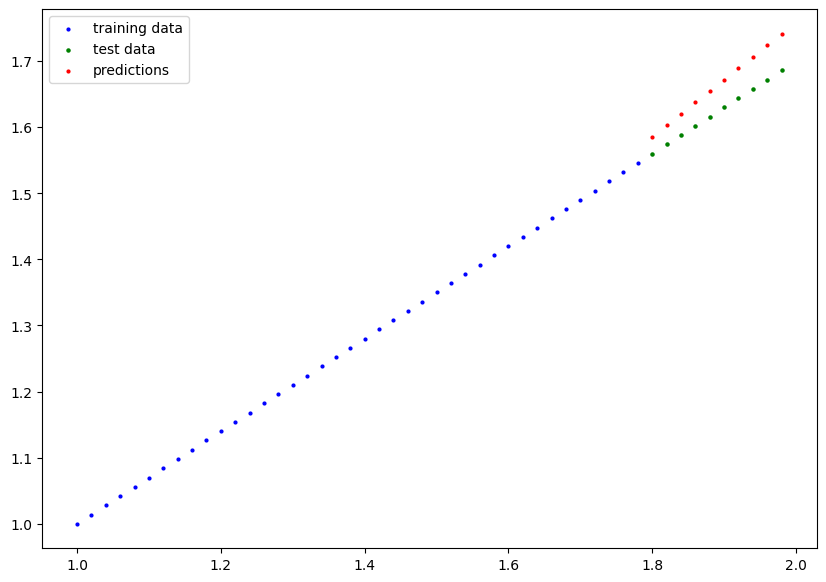

In [71]:
plot_predictions(predictions=y_prediction)

train model: for a model to move from a unknown or random parameters to known parameters that better represents the data
loss function: calculates the error or how far off the predictions are compared to the actual values, loss = predictions - outputs (actual outputs) and one of the goals is to reduce the distance between predictions and outputs
optimizer: takes into account the loss and adjusts model's parameters(generally weights and bias) to reduce the loss

key aspects: training loop and testing loop

In [72]:
loss_function = nn.L1Loss() # mean absolute error or distance between predictors and true values

optimizer = optim.SGD(model_linear_rig.parameters(), lr=0.01) # gradient descent optimizer adjusts weights and bias and lowers loss values

num_epochs = 10000 # number of training loops

#tracking training data
epoch_count = []
loss_values = []
test_loss_values = []

# a training loop
for epoch in range(num_epochs): # iterates the model to train for num_epoch times
    model_linear_rig.train() # set the model to train mode
    optimizer.zero_grad() # set the gradients to zero so it doesn't accumulate
    y_predictions = model_linear_rig(X_train) # make predictions of the model's tranied state

    loss = loss_function(y_train, y_predictions) # computes loss between the actual values and predictions made in previous step

    loss.backward() # computes the gradients
    optimizer.step() # number of steps that the optimizer should move (set in learning rate or lr)

    model_linear_rig.eval()

    with torch.inference_mode():
        test_pred = model_linear_rig(X_test)
        test_loss = loss_function(test_pred, y_test)

    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)


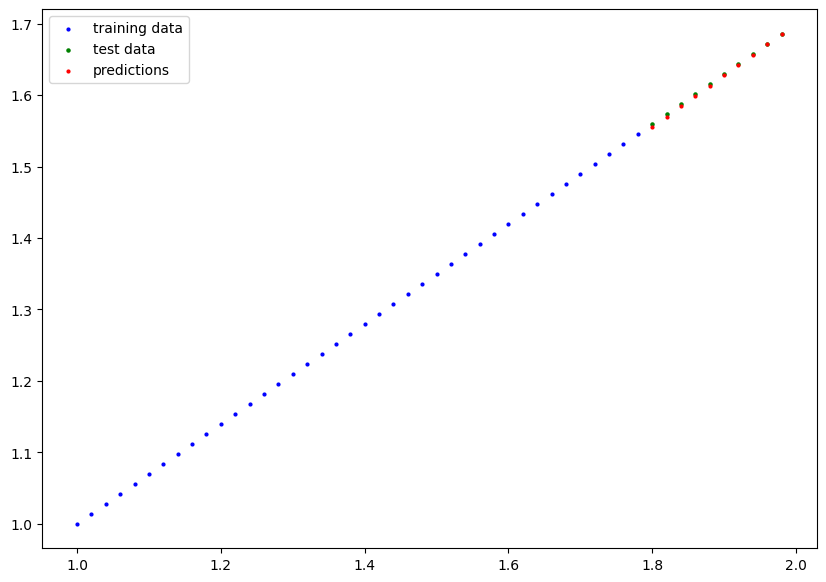

In [73]:
with torch.inference_mode():
    y_preds = model_linear_rig(X_test)

plot_predictions(predictions=y_preds)

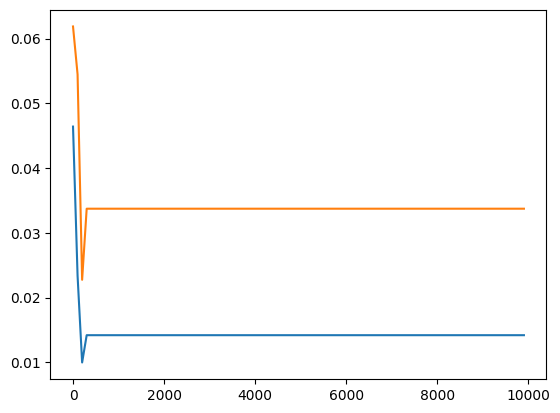

In [74]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values)))
plt.plot(epoch_count, test_loss_values)

In [75]:
# saving pytorch model
from pathlib import Path

# create models directorry
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_linear_rig_sample.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# save the model state_dict
torch.save(obj=model_linear_rig.state_dict(), f=MODEL_SAVE_PATH)



In [76]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1656 Mar 17 20:35 model_linear_rig_sample.pth


In [77]:
# loading pytorch model
# for saved state_dict, instantiate a new instance of model class
loaded_model_linear_rig = LinearRegressionModel()
loaded_model_linear_rig.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [78]:
loaded_model_linear_rig.eval()
with torch.inference_mode():
    loaded_model_linear_rig_preds = loaded_model_linear_rig(X_test)


loaded_model_linear_rig_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])